In [1]:
# Random forest classification SKlearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# for error calculation MSE or MAE or Rsquare
from sklearn.metrics import *
# for spllititing the data_set
from sklearn.model_selection import train_test_split
# For support support vector regression
from sklearn.svm import SVR
# for time execution calculation
from datetime import datetime

In [2]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [3]:
dataframe = pd.read_csv('Data/Position_Salaries.csv')

In [4]:
dataframe.sample()

,Position,Level,Salary
2,Senior Consultant,3,60000


In [5]:
dataframe=dataframe.rename(columns={'Level':'x', 'Salary':'y'})

In [6]:
dataframe.isnull().sum()

Position    0
x           0
y           0
dtype: int64

In [7]:
dataframe.nunique()

Position    10
x           10
y           10
dtype: int64

Random Forest Regression
The value for 6.5 is  [159566.66666667]
Accuracy by r2 score is = 98.93741733372737


/home/admin1/Downloads/enter/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


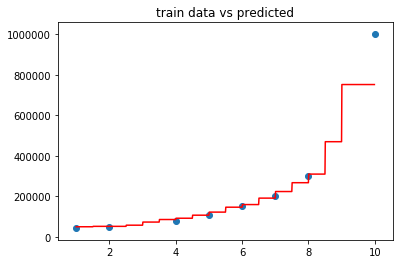

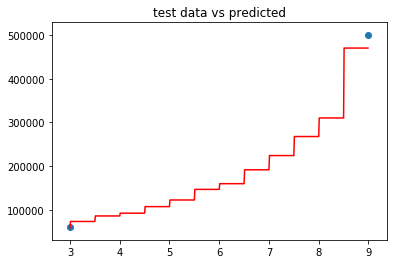

In [8]:
class Random_Forest_Regression:
    
    def __init__(self):
        self.trees = 300
        print("Random Forest Regression")
        
    def plotter(self,X,Y,reg,plot_title):
        # smoothening the plot so that we can see a smooth curve so getting points with difference 0.1
        X_smooth = np.arange(X.min(),X.max(),0.01)
        plt.title(plot_title)
        plt.plot(X_smooth,reg.predict(X_smooth.reshape(-1,1)),color='r')
        plt.scatter(X,Y)
        plt.show()
    
    def Random_Forest_Regression_demo(self,dataframe):
        # creating Linear regression object
        reg = RandomForestRegressor(n_estimators=self.trees,random_state=0)
        # creating decision regression object with random state =0 as if same function operated any where it'll give same resukt on the same set

        # Splitting independent variables and the output variables
        train_data = dataframe['x'].values
        train_Y = dataframe['y'].values
        # spilling train and test data
        train_data, test_data, train_Y, test_Y = train_test_split(train_data,train_Y, test_size=0.2,random_state=0)
        # geting the values of x till the degree provided
        
        reg.fit(train_data.reshape(-1,1),train_Y.reshape(-1,1))
        
        # predicting the values on basis of our input data
        Ypred = reg.predict(test_data.reshape(-1,1))
        
        print("The value for 6.5 is ", reg.predict(np.array(6.5).reshape(-1,1)))
        
         # error calculations
        mse = mean_squared_error(Ypred,test_Y)
        mae = mean_absolute_error(Ypred,test_Y)
        r_score = r2_score(Ypred,test_Y)
        accuracy = r_score*100
        print("Accuracy by r2 score is = {}".format(accuracy))
#         print("mae: {}, mse: {}, r2 score: {}".format(mae,mse,r_score))
        
        # plotting
        self.plotter(train_data,train_Y,reg,'train data vs predicted')
        self.plotter(test_data,test_Y,reg,'test data vs predicted')
        
    def main(self,dataframe):
        try:
            self.Random_Forest_Regression_demo(dataframe)
        except Exception as e:
            print("Process stopped because ",e)

if __name__ == '__main__':
    obj = Random_Forest_Regression()
    obj.main(dataframe)